# Predicting Car Prices

In this project, we would be attempting to predict a car's market price by using its attributes. The machine learning workflow would be practiced here. The dataset contains various information on various cars. For each car, information about the technical aspects of the vehicle such as the motor's displacement, car's weigfht, miles per gallon, acceleration and more are available. The dataset is available [here](https://archive.ics.uci.edu/ml/datasets/automobile), along with the accompanying description of what the dataset contains and the values each column in the dataset can take.

# Introduction to the Dataset

In [1]:
# Importing the relevant libraries to be used
import numpy as np
import pandas as pd
pd.set_option('max_columns', 30)

In [2]:
# Reading in the dataset into a pandas DataFrame
cars = pd.read_csv('imports-85.data')

In [3]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It appears that the original file containing the dataset does not have the column names included, resulting the pandas automatically reading in the first line as the column name. As such, the dataset ought to be read in with `names` parameter of the `read_csv()` function being given the argument of a list of the column names

In [4]:
# Creating a list to contain the column names: column_names
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
# Reading in the dataset, passing in the list of column names as parameter
cars = pd.read_csv('imports-85.data', names=column_names)

In [5]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Overview of the columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

Since we are attempting to predict car prices based on the attributes of the car, the target column would be `price`. Columns which are already numeric would include `symboling`, `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-size`, `compression-ratio`, `city-mpg`, `highway-mpg`. Some of the columns are of the object dtype but are actually numeric. These columns can be cleaned and converted to numeric and they include `normalized-losses`, `num-of-doors`, `num-of-cylinders`, `bore`, `stroke`, `horsepower`, `peak-rpm` and `price`. Particularly, for `num-of-doors` and `num-of-cylinders`, the values are in the word form of the numbers (i.e. `four` instead of the integer 4). These two columns can be handled by replacing them with the corresponding integer values.

# Data Cleaning

Machine learning algorithms would require no missing values in the training and test sets. Also, we would be employing the K-Nearest Neighbors regression algorithm to predict the car prices, which is a distance-based algorithm. As such, there is a need to scale the values in the numeric columns to prevent large values which are of a different scale from having an outsized effect in the calculation of distance as part of the algorithm.

In [7]:
# Replacing all `?` values with the numpy.nan missing value
cars = cars.replace('?', np.nan)

In [8]:
# Converting the relevant columns to numeric which are originally object dtypes
to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
cars[to_convert] = cars[to_convert].astype(float)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

Before scaling, we have to convert the two columns `num-of-doors` and `num-of-cylinders` from word form to integer form.

In [10]:
# Looking at the unique values in these two columns
cars['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [11]:
cars['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [12]:
# Create a dictionary mapping for both columns
doors_map = {'two':2, 'four':4, 'nan':np.nan}
cylinders_map = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}

In [13]:
# Doing the replacements for these two columns
cars['num-of-doors'] = cars['num-of-doors'].replace(doors_map)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(cylinders_map)

In [14]:
# Looking at the overview now after cleaning
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null float64
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null int64
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

Now, we have to deal with the missing values (i.e. `NaN`). About 20% of the rows have missing values in the `normalized-losses` column, which is rather significant. Dropping these rows would mean a big reduction in the available samples. Hence, the column would be dropped, along with all the other columns which are not of numeric and not applicable to be used in the algorithm. All the other relevant columns only have a few rooms with missing values, these rows with missing values would thus be dropped.

In [15]:
# First, dropping all the irrelevant columns, retaining only the relevant one.
cleaned_cars = cars.drop(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'], axis=1)

# Dropping rows with missing values
cleaned_cars = cleaned_cars.dropna(axis=0)

In [16]:
cleaned_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 17 columns):
symboling            193 non-null int64
num-of-doors         193 non-null float64
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
num-of-cylinders     193 non-null int64
engine-size          193 non-null int64
bore                 193 non-null float64
stroke               193 non-null float64
compression-ratio    193 non-null float64
horsepower           193 non-null float64
peak-rpm             193 non-null float64
city-mpg             193 non-null int64
highway-mpg          193 non-null int64
price                193 non-null float64
dtypes: float64(11), int64(6)
memory usage: 27.1 KB


About 10 rows are dropped due to missing values, which is about 5% of the dataset and still acceptable. Now, it is time to scale these numeric columns so all values range from 0 to 1.

In [17]:
# Min-Max scaling the feature columns to the same scale.
cleaned_cars = (cleaned_cars - cleaned_cars.min()) / (cleaned_cars.max() - cleaned_cars.min())
cleaned_cars['price'] = cars['price']

In [18]:
cleaned_cars.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.111111,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.333333,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.111111,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.222222,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


After scaling, all the numeric values for the feature columns would have values ranging from 0 to 1.

# Univariate Model

Now, we will proceed to create a custom function to replicate the univariate k-nearest neighbors algorithm.

In [19]:
# importing the relevant libraries to be used
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [20]:
# Creation of function to encapsulate the training and simple validation process of the k-nearest neighbors algorithm
def knn_train_test(training_column, target_column, dataframe):
    # Making a temporary copy of the dataframe
    temp = dataframe.copy()
    # Setting the feature columns
    X = temp[[training_column]]
    # Setting the target column
    y = temp[target_column]
    # Train-test-split using a ratio of 75:25 using sklearn
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    # Instantiate a K-Nearest Neighbors Regressor class
    knn = KNeighborsRegressor()
    # Training the KNN model using the training set
    knn.fit(X_train, y_train)
    # Making predictions on the test set
    predictions = knn.predict(X_test)
    # Calculating the MSE and RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    return rmse

In [21]:
# Testing the function with different numeric columns in the dataset
features = cleaned_cars.columns.tolist()
features.remove('price')
target = 'price'

In [22]:
rmse_table = {}
for feature in features:
    rmse = knn_train_test(feature, target, cleaned_cars)
    rmse_table[feature] = rmse
    
rmse_series = pd.Series(rmse_table)
rmse_series.sort_values()

engine-size          2663.052796
city-mpg             3040.944898
horsepower           3561.244195
highway-mpg          3831.111855
width                4325.166506
curb-weight          4426.558744
length               4846.992610
wheel-base           5172.038194
bore                 5589.411533
num-of-cylinders     5768.518088
stroke               7038.849521
compression-ratio    7252.803798
height               7296.166950
symboling            7493.692917
peak-rpm             7740.800528
num-of-doors         8276.716201
dtype: float64

Using the default number of neighbors in the K-Nearest Neighbors regression algorithm, the `city-mpg` column performed the best. However, we are also interested in what if a different number of neighbors (k) is used instead. Hence, there is a need to modify the function to cater for a inputted k value instead.

In [23]:
# Same function from before, but adding in a new input `k` to denote the number of neighbors, updating the logic accordingly
def knn_train_test(training_column, target_column, dataframe, k):
    # Making a temporary copy of the dataframe
    temp = dataframe.copy()
    # Setting the feature columns
    X = temp[[training_column]]
    # Setting the target column
    y = temp[target_column]
    # Train-test-split using a ratio of 75:25 using sklearn
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    # Instantiate a K-Nearest Neighbors Regressor class with k number of neighbors
    knn = KNeighborsRegressor(n_neighbors = k)
    # Training the KNN model using the training set
    knn.fit(X_train, y_train)
    # Making predictions on the test set
    predictions = knn.predict(X_test)
    # Calculating the MSE and RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    return rmse

In [24]:
# Create, train and test a univariate model using a range of k values for each feature column and create a plot to visualize the results
rmse_per_feature = {}
k_values = [1, 3, 5, 7, 9]
for feature in features:
    rmse_diff_k = {}
    for k in k_values:
        rmse = knn_train_test(feature, target, cleaned_cars, k)
        rmse_diff_k[k] = rmse
    rmse_per_feature[feature] = rmse_diff_k
    

In [25]:
rmse_per_feature

{'bore': {1: 9963.753366219838,
  3: 5865.146253393528,
  5: 5589.41153260487,
  7: 6479.075781538891,
  9: 7010.957109883346},
 'city-mpg': {1: 3828.0570683268747,
  3: 3332.0509291662725,
  5: 3040.9448978626256,
  7: 3328.8909321875753,
  9: 3228.362364116494},
 'compression-ratio': {1: 11351.16496224066,
  3: 9025.806081551316,
  5: 7252.803797828528,
  7: 6260.011315928418,
  9: 6546.363885062169},
 'curb-weight': {1: 4612.260513112451,
  3: 5174.237550502,
  5: 4426.558743838498,
  7: 4276.275043810018,
  9: 4083.3164424350234},
 'engine-size': {1: 3580.2252779422033,
  3: 2359.1349278304856,
  5: 2663.052796000431,
  7: 3169.4482352272435,
  9: 3232.2330596707006},
 'height': {1: 12403.235833557997,
  3: 8470.674800775843,
  5: 7296.1669502918185,
  7: 7387.028715304485,
  9: 7569.481872765232},
 'highway-mpg': {1: 6033.0992881278,
  3: 4267.968121290708,
  5: 3831.111854918616,
  7: 3744.04260865092,
  9: 3824.3151193743347},
 'horsepower': {1: 3540.3328276607335,
  3: 4442.622

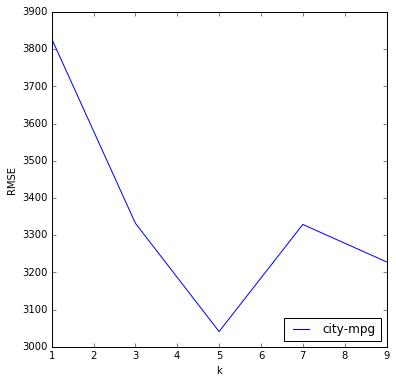

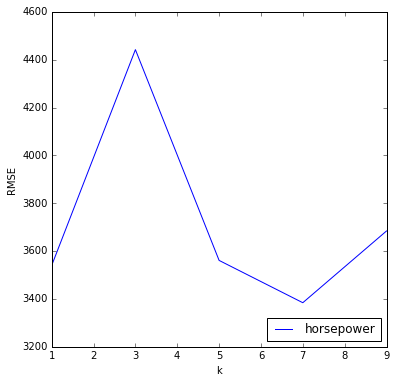

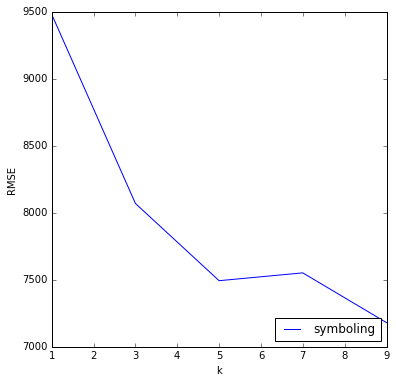

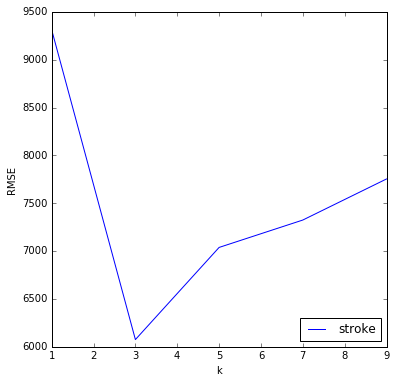

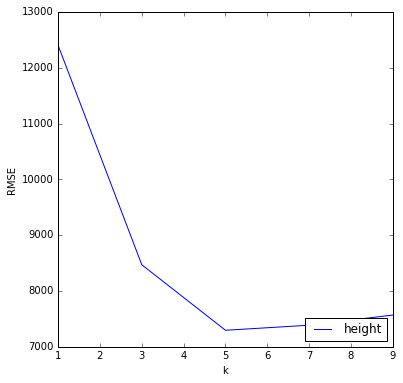

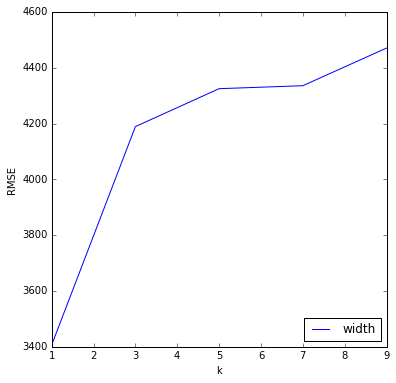

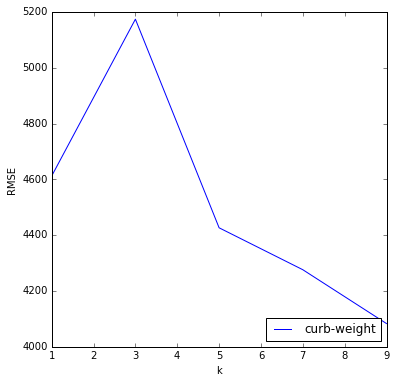

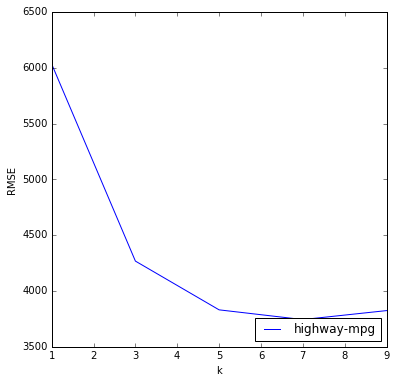

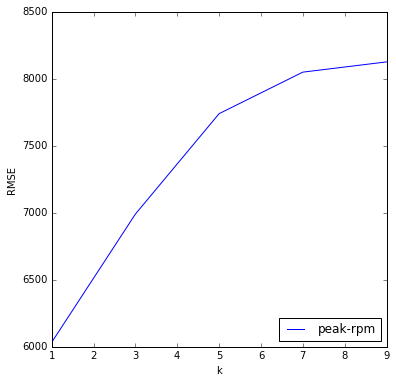

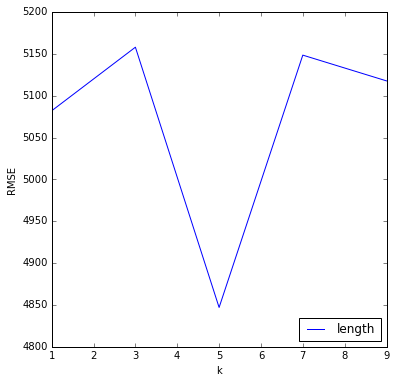

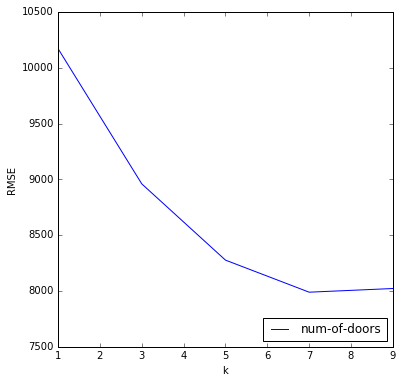

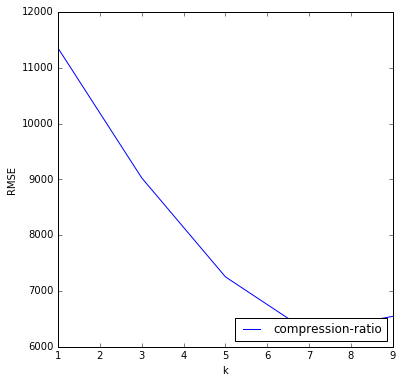

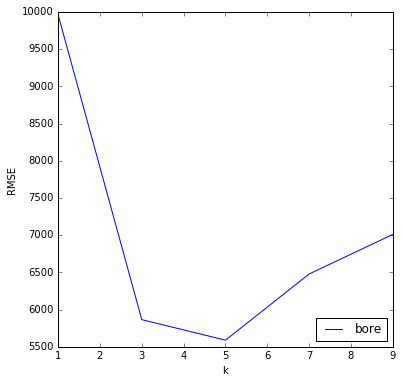

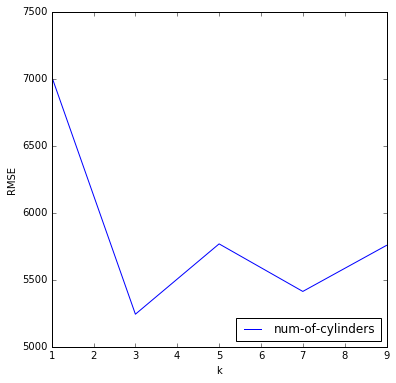

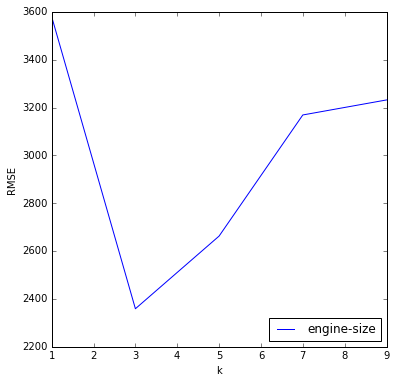

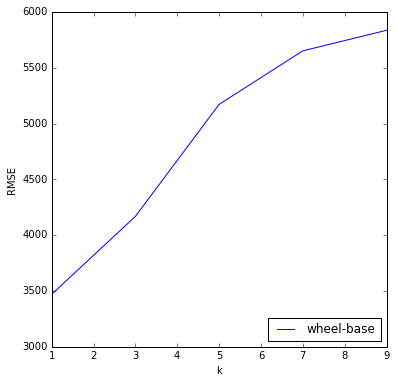

In [26]:
# Visualizing the above results with a line plot
import matplotlib.pyplot as plt
%matplotlib inline

for feature, rmses in rmse_per_feature.items():
    plt.figure(figsize=(6,6))
    x = list(rmses.keys())
    x.sort()
    y = [rmses.get(key) for key in x]
    plt.plot(x,y, label=feature)
    plt.xlabel('k')    
    plt.ylabel('RMSE')
    plt.legend(loc='lower right')
    plt.show()

# Multivariate Model

Previously, we only worked with a single feature column. Now, we would like to modify the same previous function to work with multiple columns intead.

In [27]:
# Same function from before, but to accept a list of feature training columns instead of just a string
def knn_train_test(training_columns, target_column, dataframe, k):
    # Making a temporary copy of the dataframe
    temp = dataframe.copy()
    # Setting the feature columns
    X = temp[training_columns]
    # Setting the target column
    y = temp[target_column]
    # Train-test-split using a ratio of 75:25 using sklearn
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    # Instantiate a K-Nearest Neighbors Regressor class with k number of neighbors
    knn = KNeighborsRegressor(n_neighbors = k)
    # Training the KNN model using the training set
    knn.fit(X_train, y_train)
    # Making predictions on the test set
    predictions = knn.predict(X_test)
    # Calculating the MSE and RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    return rmse

The default number of neighbors which is the default k value used by scikit-learn is 5. Previously, while looking at the univariate models, the top 5 features which correspond to the lowest 5 RMSES are:

Feature|RMSE
---|---
engine-size|2663.052796
city-mpg    |         3040.944898
horsepower   |        3561.244195
highway-mpg   |       3831.111855
width          |      4325.166506

Now, we would like to train and test a multivariate k-nearest neighbors model using the default k=5 value using the best 2, best 3, best 4 and best 5 features.

In [28]:
# Train and test best number of features with the multivariate k-nearest neighbors model with the newly modified custom function
best_2_rmse = knn_train_test(['engine-size', 'city-mpg'], 'price', cleaned_cars, 5)
best_3_rmse = knn_train_test(['engine-size', 'city-mpg', 'horsepower'], 'price', cleaned_cars, 5)
best_4_rmse = knn_train_test(['engine-size', 'city-mpg', 'horsepower', 'highway-mpg'], 'price', cleaned_cars, 5)
best_5_rmse = knn_train_test(['engine-size', 'city-mpg', 'horsepower', 'highway-mpg', 'width'], 'price', cleaned_cars, 5)
best_rmse = [best_2_rmse, best_3_rmse, best_4_rmse, best_5_rmse]
best_rmse_series = pd.Series(best_rmse, index=range(2,6))
best_rmse_series

2    2826.081135
3    2205.167319
4    2205.851062
5    2587.994108
dtype: float64

Looking at the results above, we achieved the lowest RMSE using the best 3 features - `engine-size`, `city-mpg` and `horsepower` when default k=5.

# Hyperparameter Tuning

Now, we ought to optimize the model that performed the best in the previous step. For the top 3 models in the last step, the hyperparameter which is k would be varied from 1 to 25 and the resulting RMSE values would be plotted. Then, we would be able to identify the optimal k value for each model using the elbow method. The top 3 models from the previous step are using the best 3, best 4 and best 5 features.

In [29]:
# Varying the hyperparameter values and training and testing again using the best 3, best 4 and best 5 features
k_values = list(range(1,26))
best_3_vary_k = []
best_4_vary_k = []
best_5_vary_k = []

for k in k_values:
    best_3_vary_k.append(knn_train_test(['engine-size', 'city-mpg', 'horsepower'], 'price', cleaned_cars, k))
    best_4_vary_k.append(knn_train_test(['engine-size', 'city-mpg', 'horsepower', 'highway-mpg'], 'price', cleaned_cars, k))
    best_5_vary_k.append(knn_train_test(['engine-size', 'city-mpg', 'horsepower', 'width'], 'price', cleaned_cars, k))

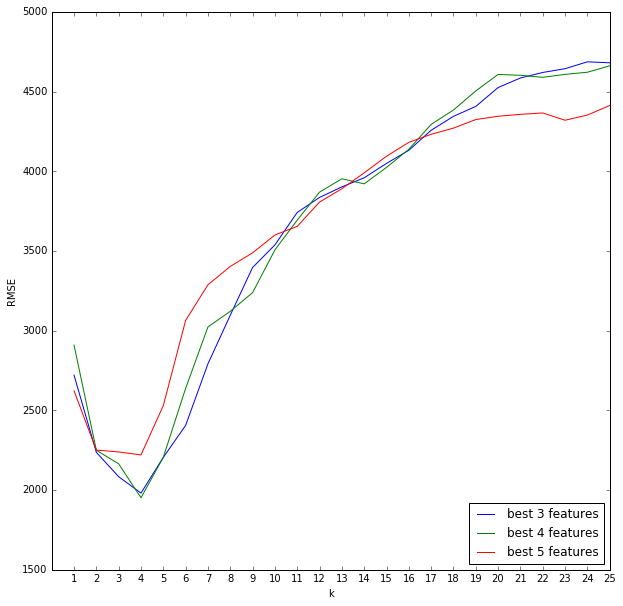

In [30]:
# Visualizing how the RMSEs vary with k for all top 3 models from previous step
plt.figure(figsize=(10,10))
plt.plot(k_values, best_3_vary_k, label='best 3 features')
plt.plot(k_values, best_4_vary_k, label='best 4 features')
plt.plot(k_values, best_5_vary_k, label='best 5 features')
plt.legend(loc='lower right')
plt.xticks(range(1,26))
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

# Conclusion

Looking at the above plot, using the elbow method, we can identify the optimal hyperparameter for each of the 3 models. The optimal k value is 4 for all models, whether using the best 3, best 4 or best 5 features.